# Google Colab Setup

In [35]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [36]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540 Final Project/Notebooks'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['extract_filename_features.py', 'extract_audio_features.py', 'data', 'normalize_data.py', 'svm.ipynb', 'load_train_test_split.ipynb', 'decision_tree_random_forest.ipynb', 'Neural outputs.gdoc', 'Neural Network.ipynb', 'pca_and_svm.ipynb']


# Import Statements

In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# normalized_data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, "data", "normalized_features.csv"))

# features = normalized_data.iloc[:, 1:89]

In [38]:
%run "{GOOGLE_DRIVE_PATH}/load_train_test_split.ipynb"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['extract_filename_features.py', 'extract_audio_features.py', 'data', 'normalize_data.py', 'svm.ipynb', 'load_train_test_split.ipynb', 'decision_tree_random_forest.ipynb', 'Neural outputs.gdoc', 'Neural Network.ipynb', 'pca_and_svm.ipynb']


# Initial PCA

In [39]:
def split_features_label(input_df):
  features = input_df.iloc[:, 1:89]
  labels = input_df.iloc[:, 89:]
  return features, labels


train, test = gen_train_test_split()

train_val, val, test_val = gen_train_val_test_split()

x_train, y_train = split_features_label(train)
print(x_train.shape)
print(y_train.shape)
x_test, y_test = split_features_label(test)

(1140, 88)
(1140, 2)


In [40]:
# keeping all components
pca = PCA()

In [41]:
pca.fit(x_train)

PCA()

1.0000000000000002

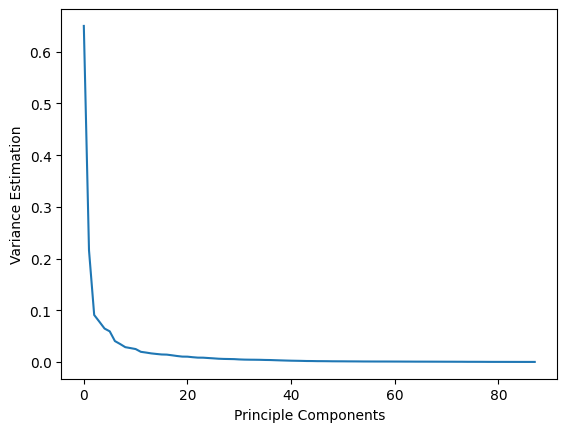

In [42]:
plt.plot(range(pca.explained_variance_.shape[0]), pca.explained_variance_)
plt.xlabel('Principle Components')
plt.ylabel('Variance Estimation')
sum(pca.explained_variance_ratio_) # should be 1

In [43]:
for i in range(0, 90, 5):
  print(f'number of principle components: {i}\tvariance %: {100 * sum(pca.explained_variance_ratio_[:i]):.2f}%')

number of principle components: 0	variance %: 0.00%
number of principle components: 5	variance %: 69.05%
number of principle components: 10	variance %: 80.95%
number of principle components: 15	variance %: 86.89%
number of principle components: 20	variance %: 90.85%
number of principle components: 25	variance %: 93.57%
number of principle components: 30	variance %: 95.45%
number of principle components: 35	variance %: 96.83%
number of principle components: 40	variance %: 97.86%
number of principle components: 45	variance %: 98.49%
number of principle components: 50	variance %: 98.91%
number of principle components: 55	variance %: 99.23%
number of principle components: 60	variance %: 99.48%
number of principle components: 65	variance %: 99.68%
number of principle components: 70	variance %: 99.83%
number of principle components: 75	variance %: 99.94%
number of principle components: 80	variance %: 99.99%
number of principle components: 85	variance %: 100.00%


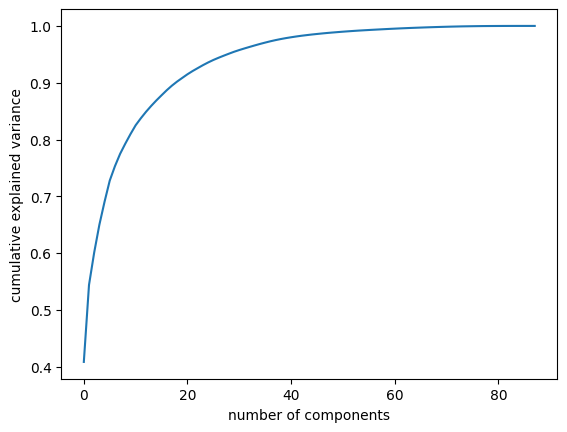

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
x_test

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
1297,0.464311,0.095276,0.468857,0.437400,0.440480,0.179125,0.062492,0.007372,0.202084,0.003727,...,0.632257,0.500273,0.020508,0.479266,0.350623,0.152439,0.159033,0.172509,0.484579,0.533967
897,0.246879,0.254255,0.259717,0.249284,0.251696,0.213791,0.082095,0.013199,0.230145,0.020696,...,0.082116,0.426609,0.090687,0.453160,0.297559,0.132622,0.307432,0.246937,0.496009,0.565745
844,0.188152,0.211871,0.181506,0.167327,0.223272,0.316136,0.093433,0.067050,0.206177,0.007717,...,0.295265,0.410294,0.016415,0.291951,0.529773,0.078397,0.066499,0.097496,0.443341,0.353978
547,0.465729,0.060030,0.476975,0.450976,0.435499,0.151695,0.068826,0.018882,0.207491,0.011152,...,0.583450,0.209339,0.031131,0.361840,0.087501,0.457317,0.270270,0.329959,0.416192,0.600631
555,0.537319,0.169243,0.496343,0.554395,0.523588,0.298121,0.107662,0.096590,0.250698,0.090805,...,0.574270,0.267020,0.048792,0.341196,0.106457,0.371951,0.259459,0.312378,0.421087,0.694784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.370572,0.068508,0.401864,0.359099,0.333765,0.092226,0.066569,0.017023,0.213843,0.016865,...,0.316815,0.487912,0.074235,0.404884,0.185875,0.252032,0.102307,0.232286,0.470077,0.710236
560,0.419074,0.160641,0.448838,0.398611,0.380228,0.093047,0.099700,0.000000,0.200715,0.003053,...,0.404584,0.416764,0.018204,0.453160,0.296393,0.158537,0.101989,0.223495,0.484127,0.463745
1381,0.457222,0.136582,0.471789,0.445378,0.433243,0.157696,0.000000,0.058204,0.201934,0.004462,...,0.987783,0.588176,0.022673,0.472069,0.517816,0.069686,0.044333,0.107019,0.434323,0.330572
548,0.478293,0.065645,0.489646,0.460650,0.435517,0.125391,0.064413,0.018184,0.204384,0.010438,...,0.597241,0.242135,0.040041,0.542046,0.169892,0.278455,0.296242,0.245471,0.522778,0.544849


# PCA for SVM

In [58]:
# Function: pca_components_for_goal_var
# Purpose:
#   - This function is designed to perform Principal Component Analysis (PCA) on a given dataset and reduce its dimensionality while retaining a specified percentage of the original variance.
# Parameters:
#   - x_train: DataFrame representing the training data
#   - x_test: DataFrame representing the testing data
#   - y_tgoal_var: Float representing the desired explained variance (in percentage)
# Process:
#   - The function first fits a PCA model on the training data
#   - It then identifies the minimum number of principal components needed to explain at least 'y_tgoal_var' percent of the variance in the training data
#   - The training and testing data are then transformed into these principal components
# Returns:
#   - A transformed training DataFrame with reduced dimensionality, where each column represents a principal component
#   - A transformed testing DataFrame with reduced dimensionality, where each column represents a principal component
# Note:
#   - The transformed DataFrames retain at least 'y_tgoal_var' percent of the original data variance


def pca_components_for_goal_var(x_train, x_test, y_tgoal_var):
  pca_full = PCA()
  pca_full.fit(x_train)
  for i in range(0, 90):
    if (100 * sum(pca.explained_variance_ratio_[:i])) >= y_tgoal_var:
      pca_comp = PCA(i)
      pca_comp.fit(x_train)
      x_train_pca = pd.DataFrame(pca_comp.transform(x_train), columns=[f'PC{i+1}' for i in range(pca_comp.n_components_)])
      x_test_pca = pd.DataFrame(pca_comp.transform(x_test), columns=[f'PC{i+1}' for i in range(pca_comp.n_components_)])
      return x_train_pca, x_test_pca

In [59]:
x_train_pca, x_test_pca = pca_components_for_goal_var(x_train, x_test, 90)

TypeError: cannot unpack non-iterable NoneType object

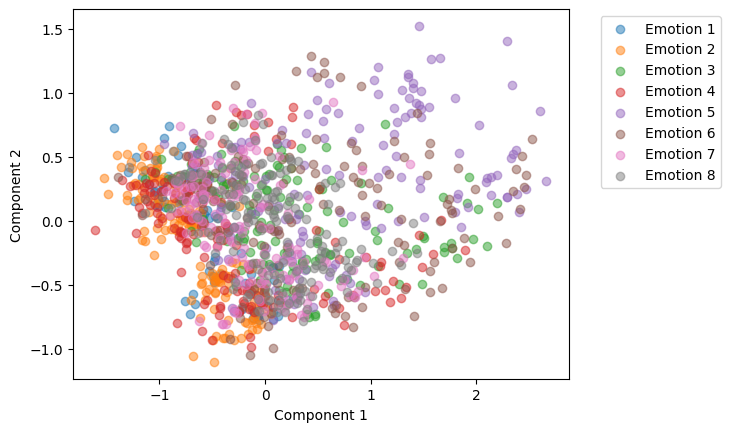

In [48]:
pca = PCA(2)
projected = pca.fit_transform(x_train)
emotion_levels = sorted(y_train['target'].unique())
for emotion_level in emotion_levels:
    indices = y_train['target'] == emotion_level
    plt.scatter(projected[indices, 0], projected[indices, 1],
                label=f'Emotion {emotion_level}', alpha=0.5)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

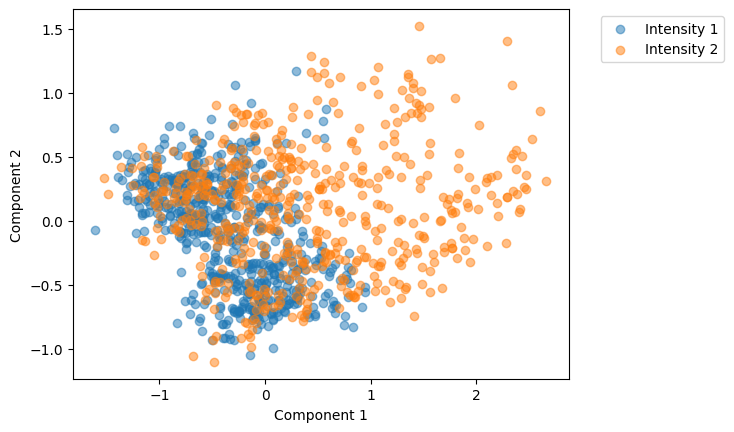

In [49]:
pca = PCA(2)
projected = pca.fit_transform(x_train)
intensity_levels = sorted(y_train['intensity'].unique())
for intensity_level in intensity_levels:
    indices = y_train['intensity'] == intensity_level
    plt.scatter(projected[indices, 0], projected[indices, 1],
                label=f'Intensity {intensity_level}', alpha=0.5)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##SVM Classifiers

In [56]:
# Create an svm classifier for emotion
svc_emo = SVC().fit(x_train_pca, y_train['target'])

# Predict
y_pred_emo = svc_emo.predict(x_test_pca)

# Get the accuracies
acc = accuracy_score(y_test['target'], y_pred_emo)
print("Accuracy:", acc)

Accuracy: 0.49


In [51]:
# Create an svm classifier for intensity
svc_in = SVC().fit(x_train_pca, y_train['intensity'])

# Predict
y_pred_in = svc_in.predict(x_test_pca)

# Get the accuracies
acc = accuracy_score(y_test['intensity'], y_pred_in)
print("Accuracy:", acc)

Accuracy: 0.7433333333333333


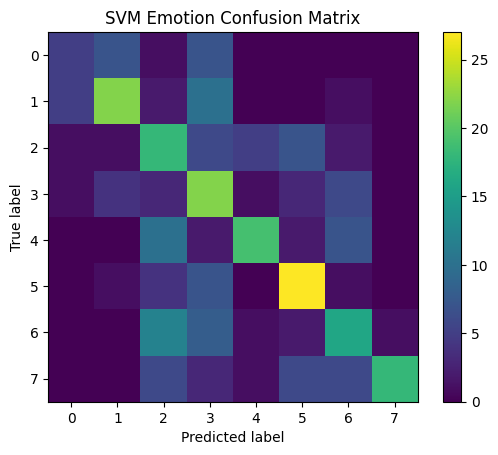

In [54]:
# Create confusion matrix for emotion
conf_matrix_emo = confusion_matrix(y_test['target'], y_pred_emo)
plt.imshow(conf_matrix_emo)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SVM Emotion Confusion Matrix')
plt.colorbar()
plt.show()

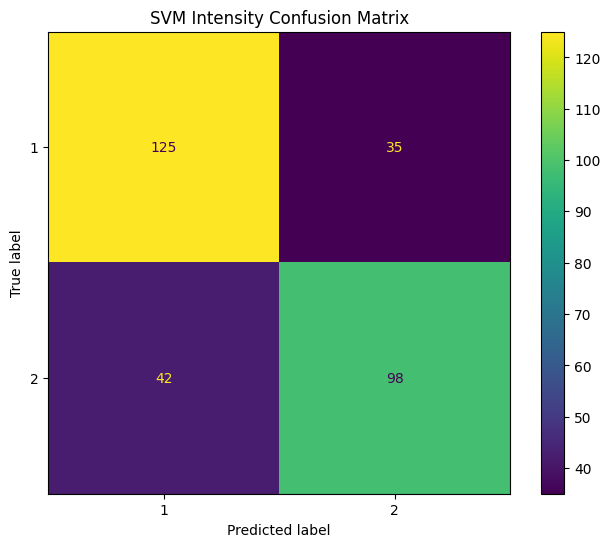

In [55]:
# Create confusion matrix for intensity
conf_matrix_in = confusion_matrix(y_test['intensity'], y_pred_in)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_in, display_labels=svc_in.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)

ax.set_title('SVM Intensity Confusion Matrix')

plt.show()